In [1]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
import torchvision
import torchvision.utils as utils
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = datasets.CIFAR10(root = 'data',train = True, transform = transform,download = True)
test_data = datasets.CIFAR10(root = 'data', train = False, transform = transform,download = True)

100.0%


Extracting data\cifar-10-python.tar.gz to data
Files already downloaded and verified


In [4]:
#obtain indices that are going to be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(0.2 * num_train))

train_idx, valid_idx = indices[split:], indices[:split]


train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [6]:
#Prepare data loader
train_loader = DataLoader(train_data, batch_size = 128, sampler = train_sampler)
valid_loader = DataLoader(train_data, batch_size = 128, sampler = valid_sampler)
test_loader = DataLoader(test_data, batch_size =  128)

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
import matplotlib.pyplot as plt

In [9]:
def imshow(image):
    if isinstance(image, torch.Tensor):
        image = image.numpy().transpose((1,2,0))
    else:
        image = np.array(image).transpose((1,2,0))

    mean = np.array([0.5,0.5,0.5])
    std = np.array([0.5,0.5,0.5])
    image = std*image + mean
    image = np.clip(image,0,1)
    fig, ax = plt.subplots(1,1,figsize = (32,32))

    plt.imshow(image)
    ax.axis('off')



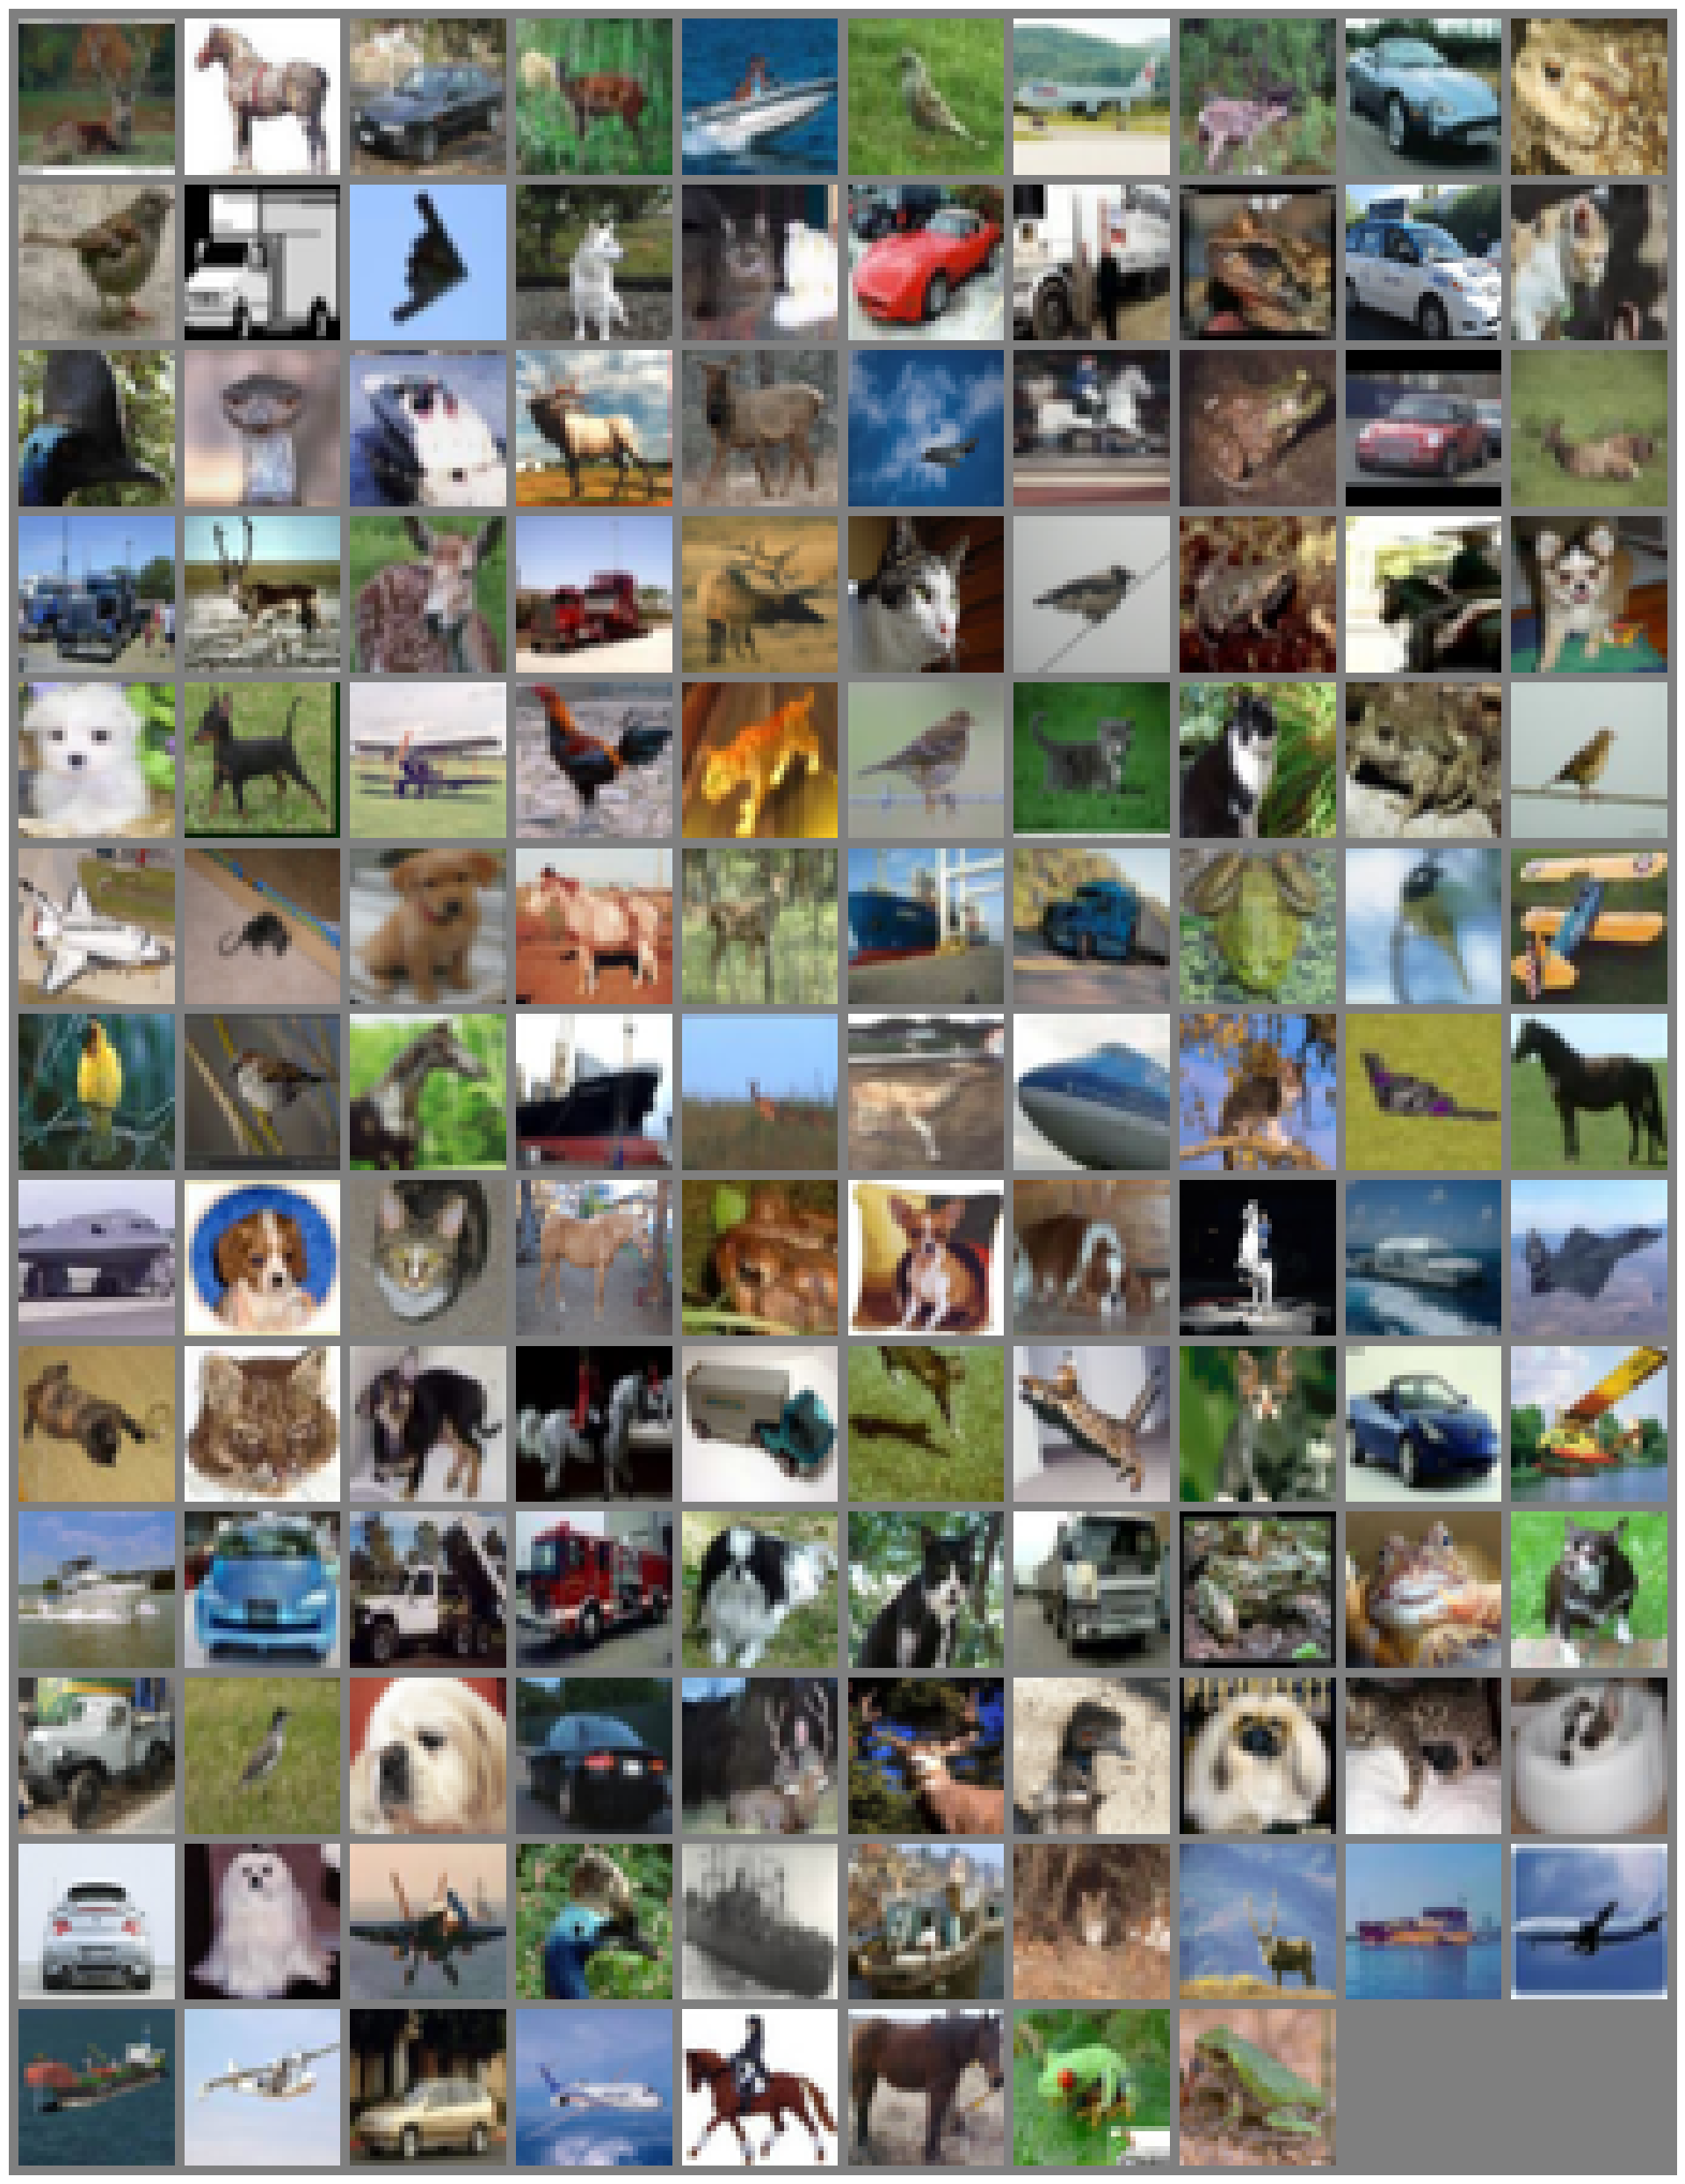

In [10]:
images, _ = next(iter(train_loader))
out = torchvision.utils.make_grid(images, nrow = 10)
imshow(out)

In [11]:
for images, labels in train_loader:
    print(images.shape)
    break

torch.Size([128, 3, 32, 32])


In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size = 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(12,24, kernel_size = 3, padding = 1, stride = 1)
        self.fc1 = nn.Linear(24*16*16, 256)
        self.fc2 = nn.Linear(256,256)
        self.out = nn.Linear(256,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = self.pool(X)
        X = F.relu(self.conv2(X))
        X = X.view(X.size(0), -1)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        out = self.out(X)
        return out 

model = NeuralNetwork()

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [33]:
n_epochs = 10
num_classes = 10
learning_rate = 0.01

train_losslist = []
valid_loss_min = np.Inf

In [34]:
for epoch in range(1, n_epochs + 1):
    print(f'Epoch {epoch} starts')
    train_loss = 0.0
    valid_loss = 0.0

    #training time
    print(f'Training happens in epoch {epoch}')
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    print(f'Validation happens in epoch {epoch}')
    model.eval()
    for images, labels in valid_loader:
        output = model(images)
        loss = criterion(output, labels)
        valid_loss += loss.item() * images.size(0)

    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losslist.append(train_loss)

    print(f'Epoch: {epoch} \t Training loss: {train_loss} \t Validation loss: {valid_loss}')

    if valid_loss < valid_loss_min:
        print('Validation loss decreased')
        torch.save(model.state_dict(),'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch 1 starts
Training happens in epoch 1
Validation happens in epoch 1
Epoch: 1 	 Training loss: 1.8395808369636535 	 Validation loss: 0.4588628028869629
Validation loss decreased, yet I'm not going to save it lol
Epoch 2 starts
Training happens in epoch 2
Validation happens in epoch 2
Epoch: 2 	 Training loss: 1.8262533207893372 	 Validation loss: 0.4525545183181763
Validation loss decreased, yet I'm not going to save it lol
Epoch 3 starts
Training happens in epoch 3
Validation happens in epoch 3
Epoch: 3 	 Training loss: 1.7585888994216918 	 Validation loss: 0.42345719990730285
Validation loss decreased, yet I'm not going to save it lol
Epoch 4 starts
Training happens in epoch 4
Validation happens in epoch 4
Epoch: 4 	 Training loss: 1.638658083486557 	 Validation loss: 0.3982520694732666
Validation loss decreased, yet I'm not going to save it lol
Epoch 5 starts
Training happens in epoch 5
Validation happens in epoch 5
Epoch: 5 	 Training loss: 1.5369364578247071 	 Validation loss:

In [15]:
for image, _ in train_loader:
    print(image.shape)
    break

torch.Size([20, 3, 32, 32])
